In [1]:
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.8 MB 15.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.8 MB 18.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.8 MB 17.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/7.8 MB 18.6 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 18.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.3/7.8 MB 18.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/7.8 MB 18.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     ---------------------------------------- 88.1/88.1 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/282.6 kB ? eta -:--:--
   -------- ------------------------------- 61.4/282.6 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 143.4/282.6 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 194.6/282.6 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 194.6/282.6 kB 1.1 MB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 778.2 kB/s eta 0:00:01
   ------------------------------- ------ 235.5/282.6 kB 761.1 kB/s eta 0:00:01
   ---------------------------------- --- 256.0/282.6 kB 655.4 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 682.7 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 601.2 kB/


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [4]:
df = pd.read_csv("mcdonalds.csv")
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


Finding Shape

In [5]:
df.shape

(1453, 15)

Finding Null values

In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

ValueError: could not convert string to float: 'No'

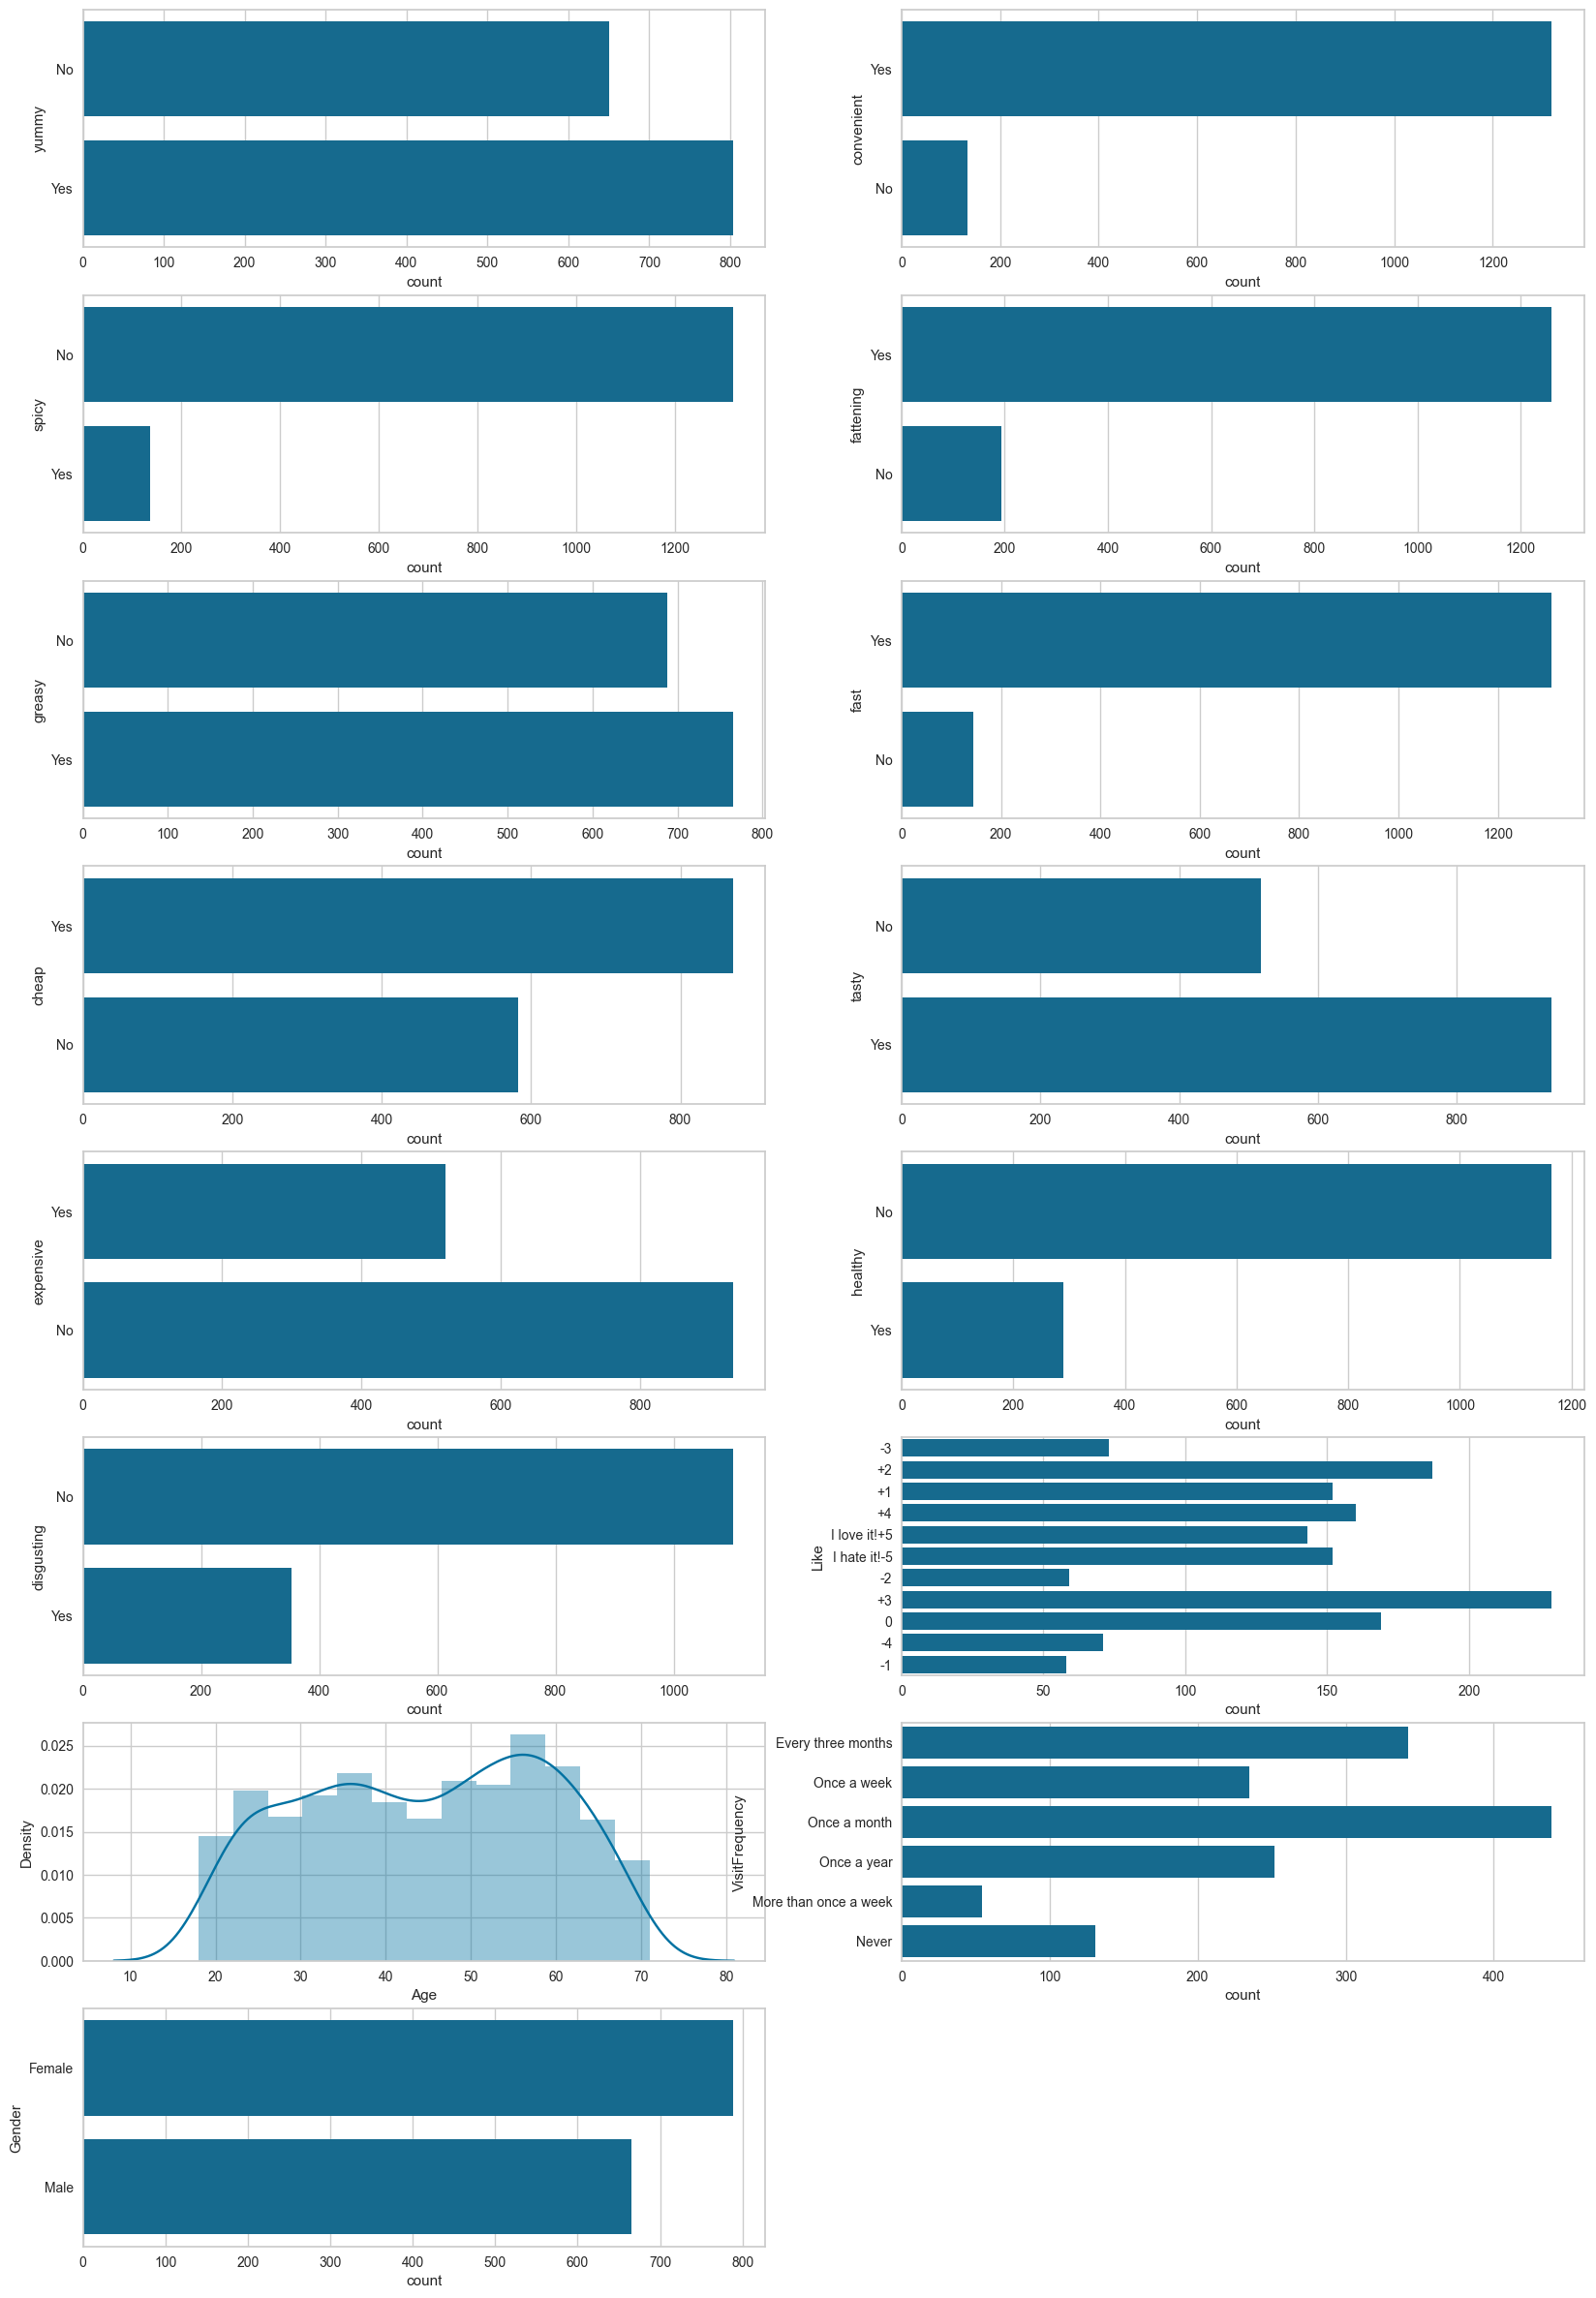

In [7]:
def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())


EDA(df, (20, 30))
     

 Age: Mcdonalds recieve more customers of age between 50-60 and 35-40

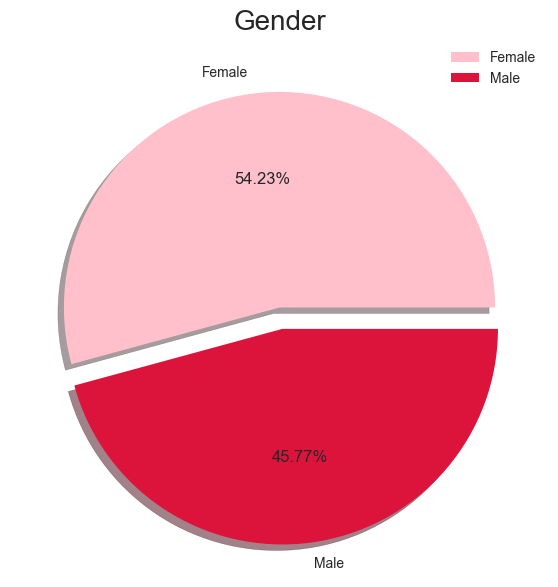

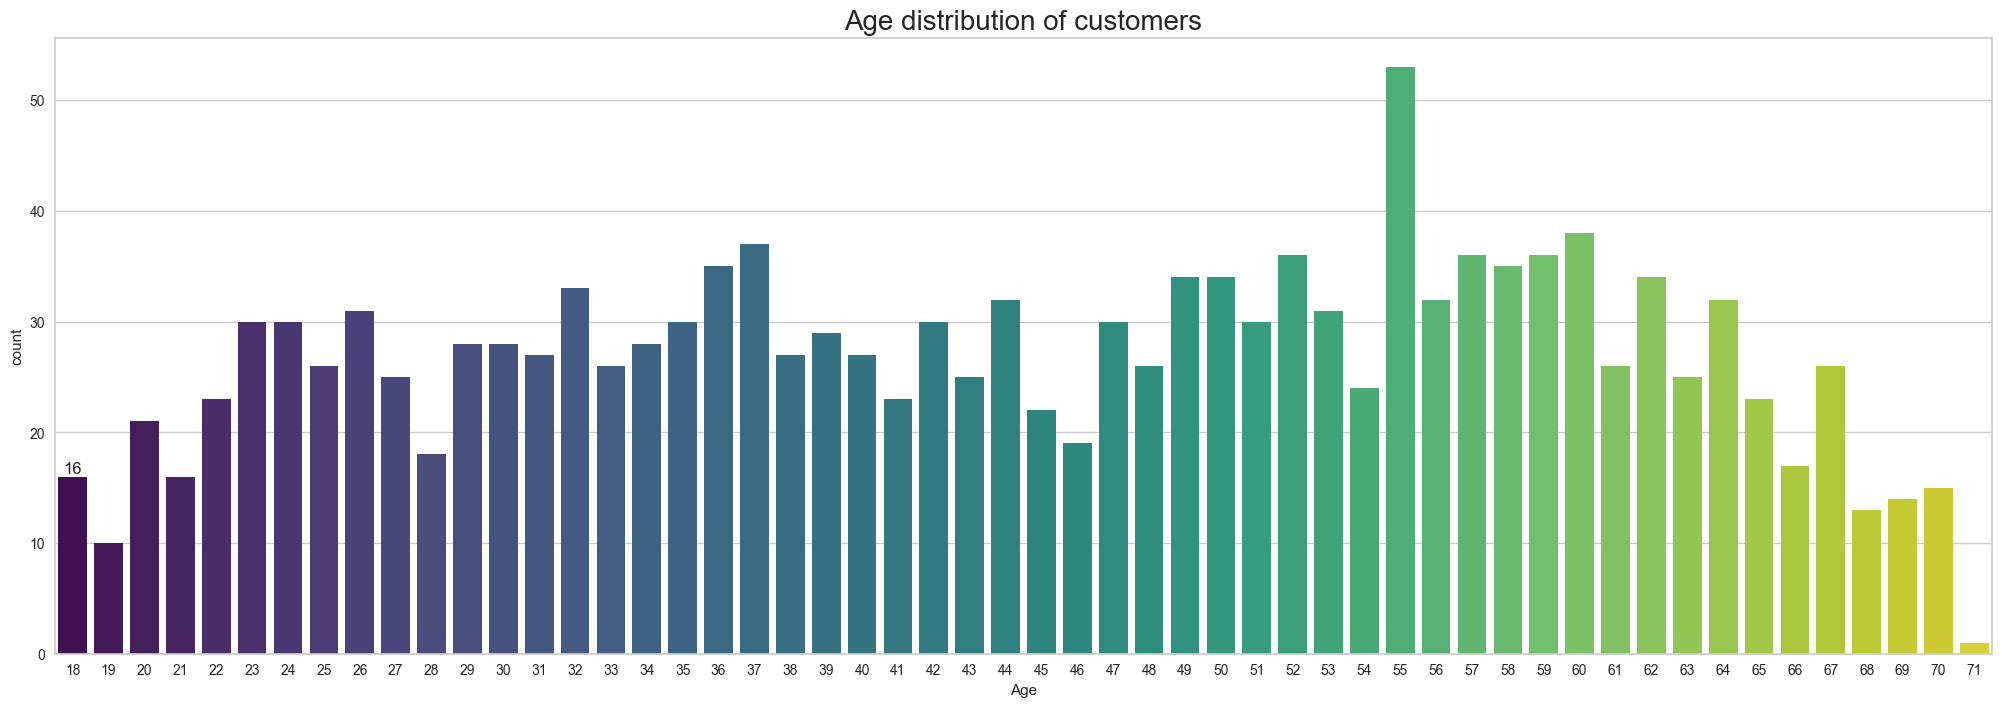

In [8]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

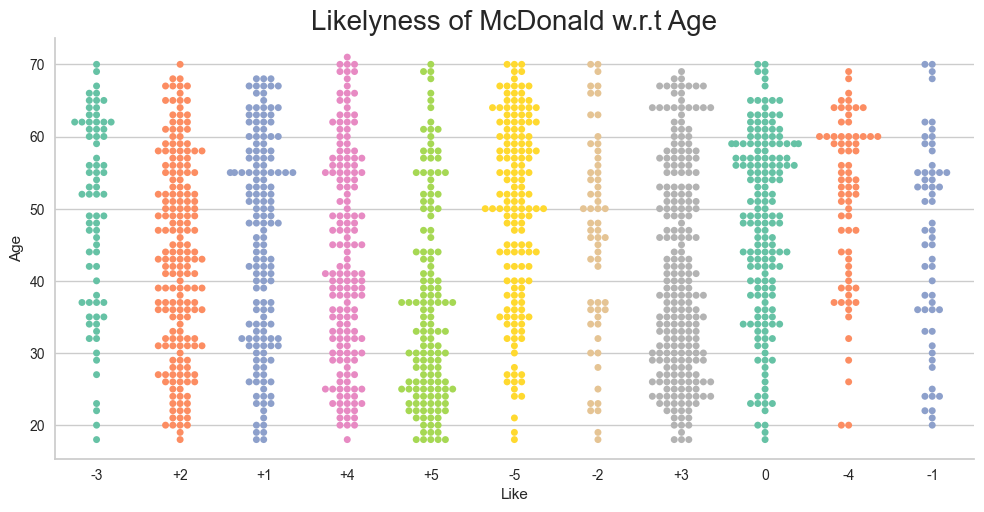

In [9]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

In [10]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [11]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


LabelEncoder will map 'Yes' to 1 and 'No' to 0

In [12]:
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Scaling

In [13]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


Variance

In [14]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

biplot

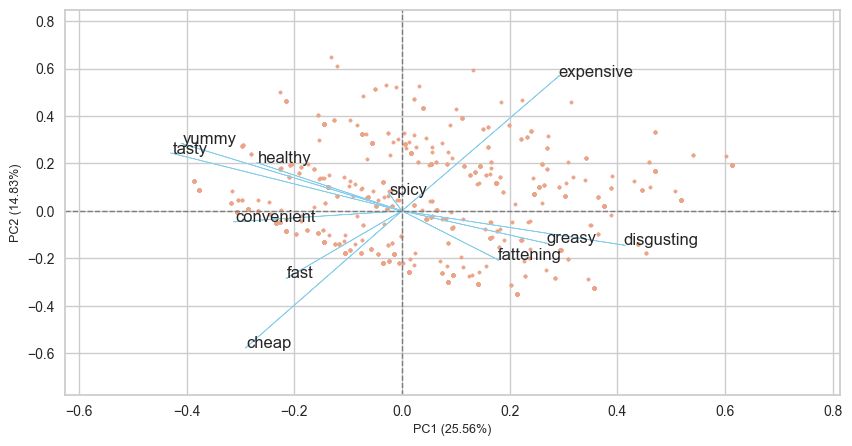

In [20]:
pca_scores = PCA().fit_transform(pca_data)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

k means clusturing

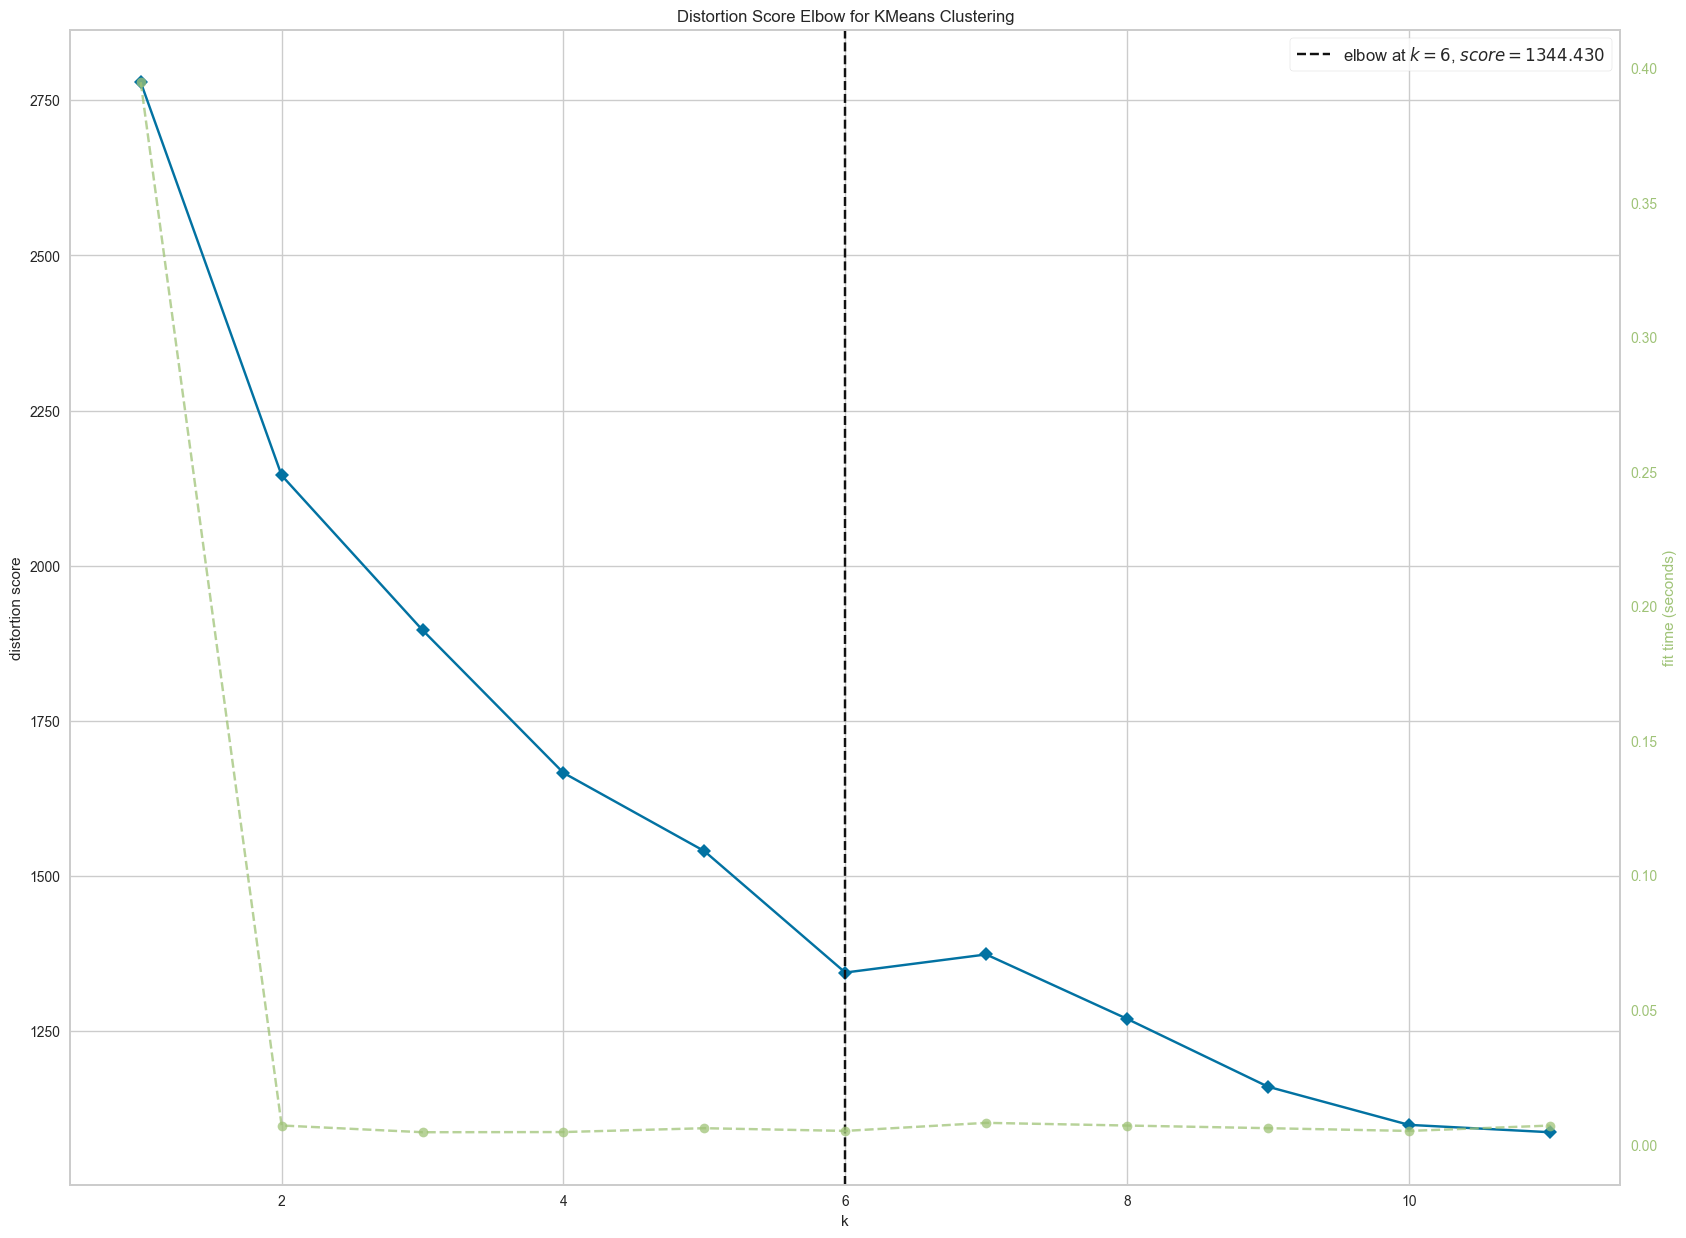

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ 
print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)
print('Cluster centroids: ', kmeans.cluster_centers_)
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158025
No. of iterations:  9
Cluster centroids:  [[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -2.22044605e-16
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [-2.22044605e-16  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]
Cluster size:  Counter({3: 553, 1: 473, 0: 296, 2: 131})


scatter plot 

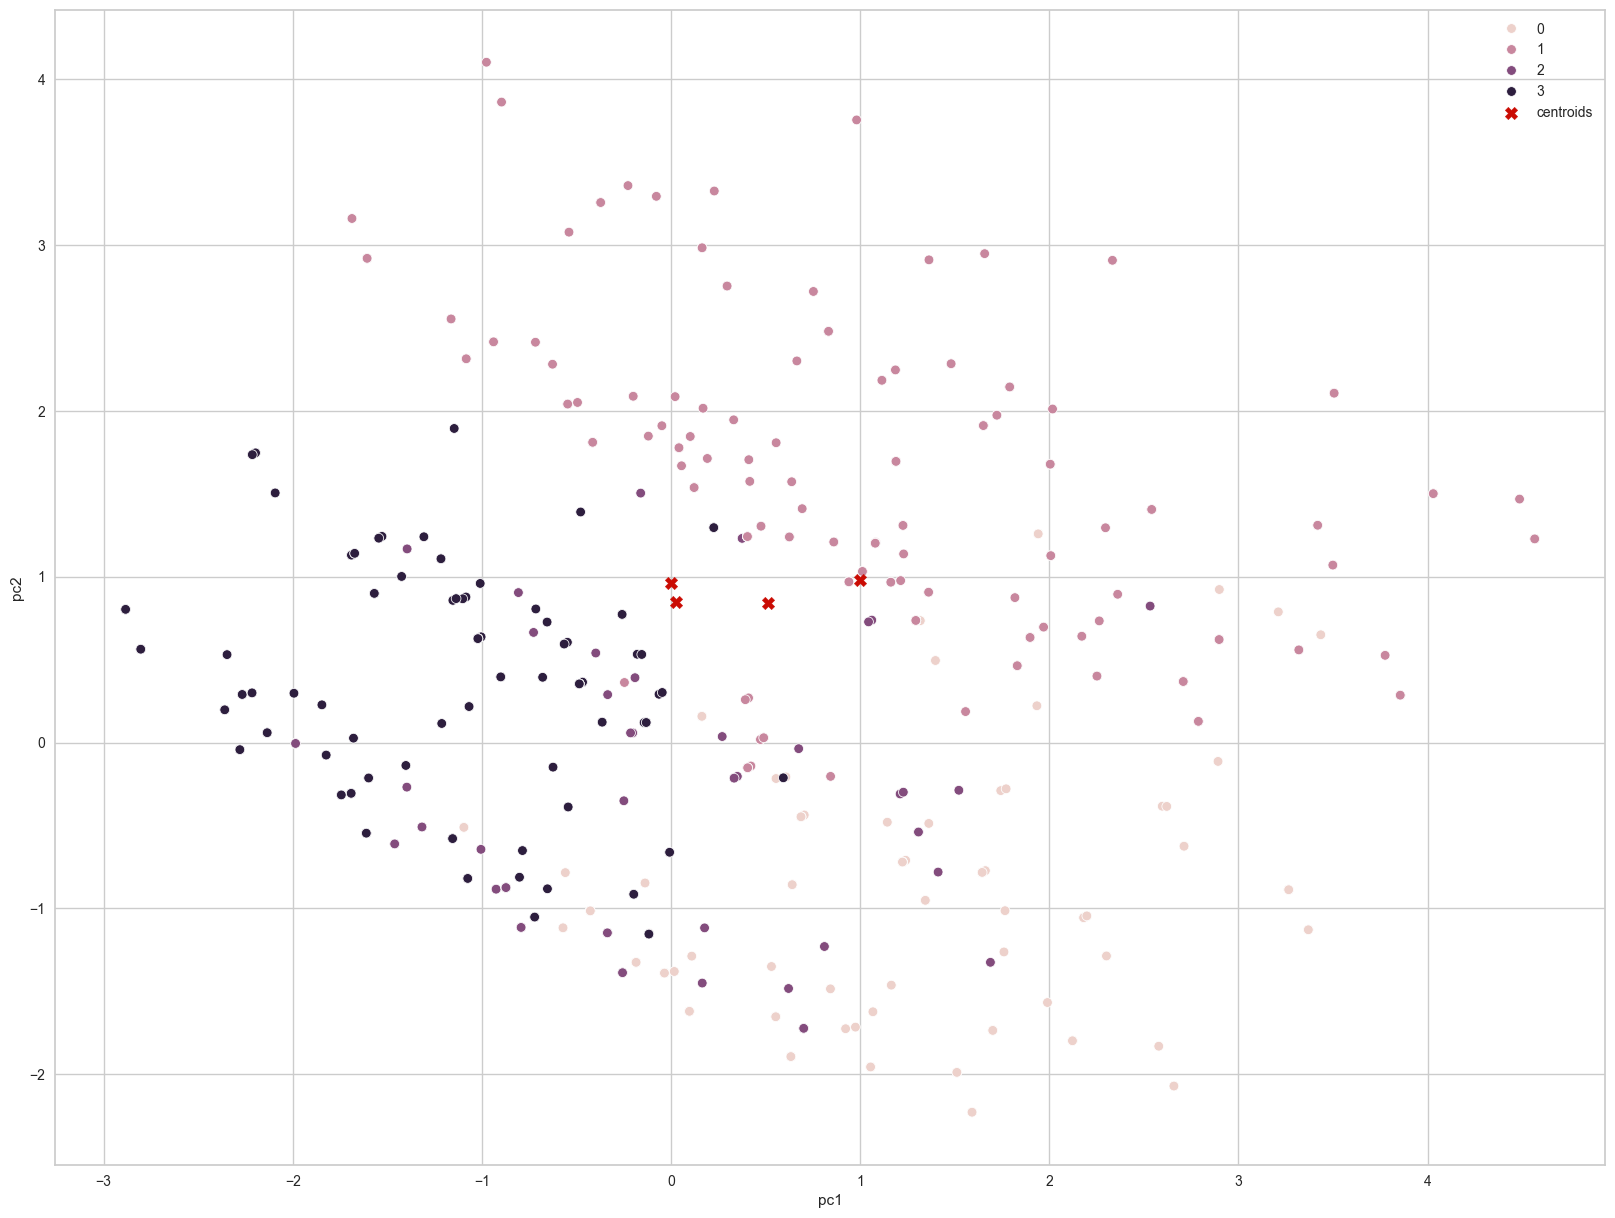

In [24]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

boxplot

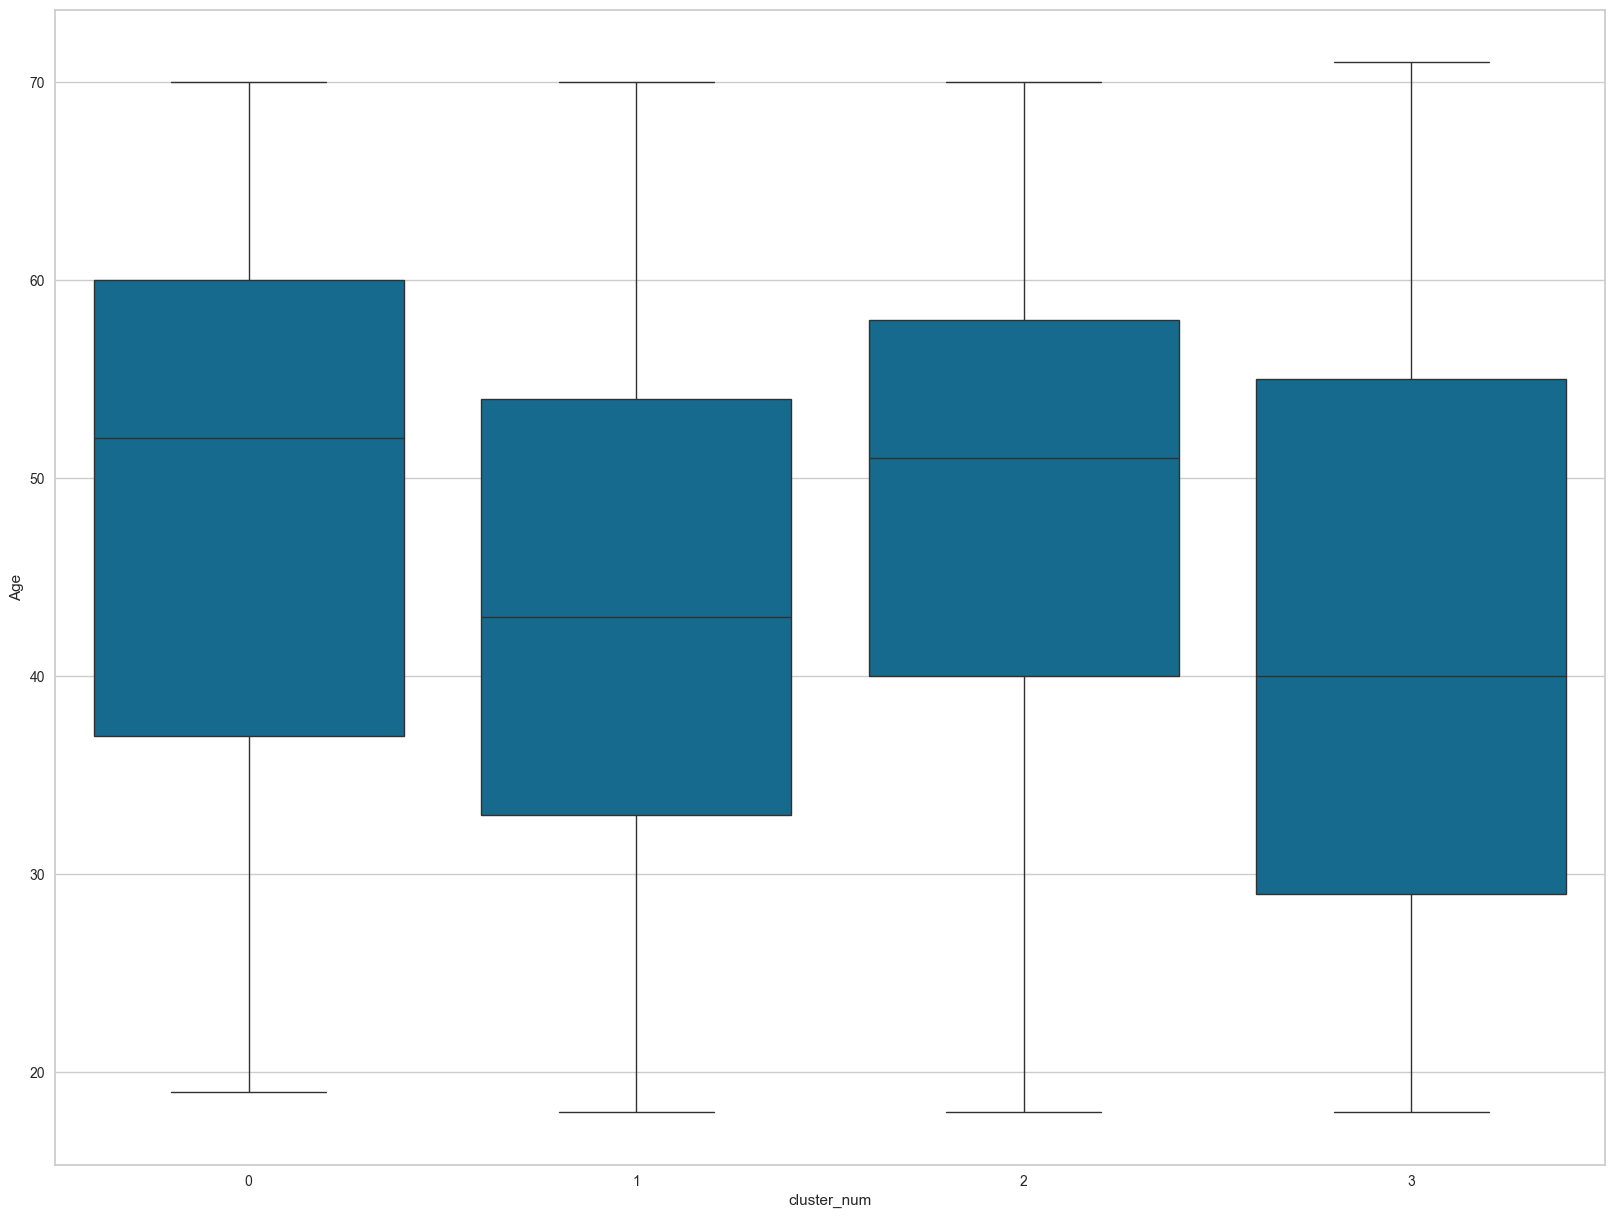

In [25]:
sns.boxplot(x="cluster_num", y="Age", data=df);